In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

retrain/images/animal1.jpg


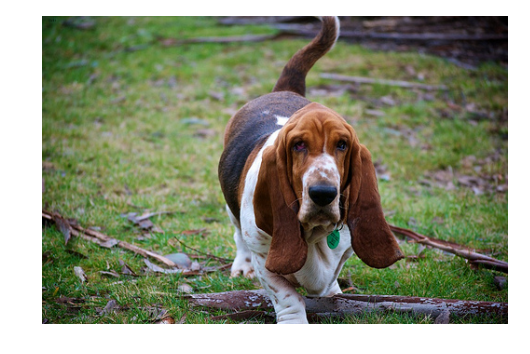

[4 2 3 0 1]
animal (score = 0.43915)
plane (score = 0.20265)
flower (score = 0.13970)
house (score = 0.11118)
guitar (score = 0.10732)

retrain/images/animal2.jpg


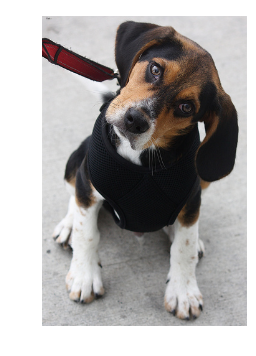

[4 2 3 0 1]
animal (score = 0.54166)
plane (score = 0.16786)
flower (score = 0.14484)
house (score = 0.07488)
guitar (score = 0.07075)

retrain/images/animal3.jpg


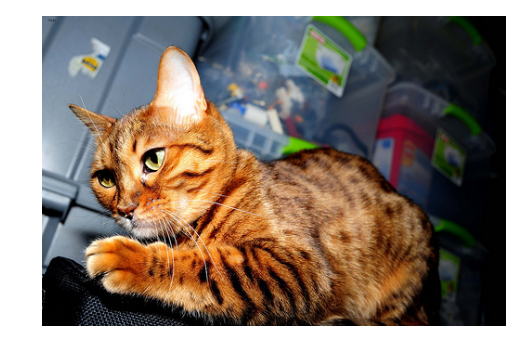

[4 2 3 1 0]
animal (score = 0.90700)
plane (score = 0.02945)
flower (score = 0.02888)
guitar (score = 0.01791)
house (score = 0.01676)

retrain/images/flower1.jpg


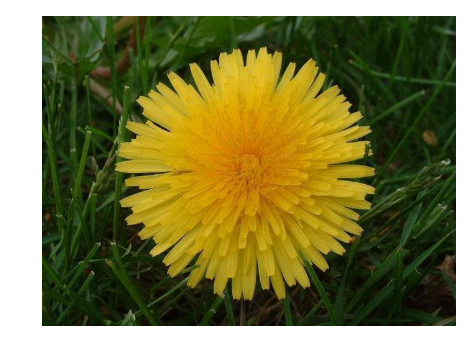

[3 4 2 0 1]
flower (score = 0.98955)
animal (score = 0.00351)
plane (score = 0.00294)
house (score = 0.00246)
guitar (score = 0.00154)

retrain/images/flower2.jpg


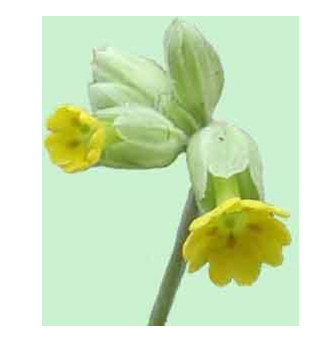

[3 0 4 2 1]
flower (score = 0.98475)
house (score = 0.00525)
animal (score = 0.00391)
plane (score = 0.00340)
guitar (score = 0.00268)

retrain/images/flower3.jpg


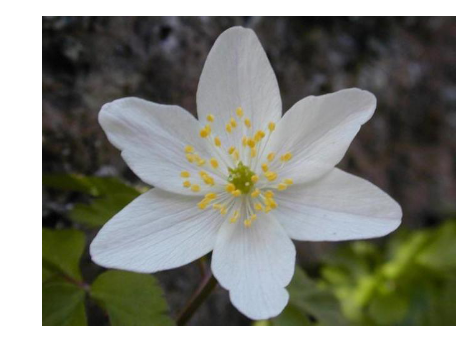

[3 4 0 1 2]
flower (score = 0.98552)
animal (score = 0.00410)
house (score = 0.00359)
guitar (score = 0.00343)
plane (score = 0.00335)

retrain/images/guitar1.jpg


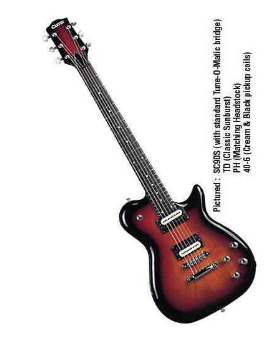

[1 4 3 2 0]
guitar (score = 0.97126)
animal (score = 0.00871)
flower (score = 0.00737)
plane (score = 0.00650)
house (score = 0.00616)

retrain/images/guitar2.jpg


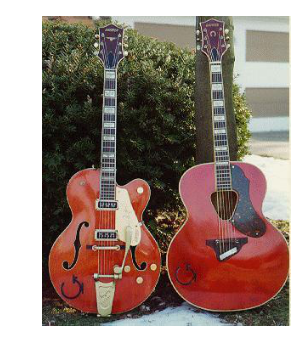

[1 4 3 2 0]
guitar (score = 0.97081)
animal (score = 0.00842)
flower (score = 0.00824)
plane (score = 0.00673)
house (score = 0.00580)

retrain/images/guitar3.jpg


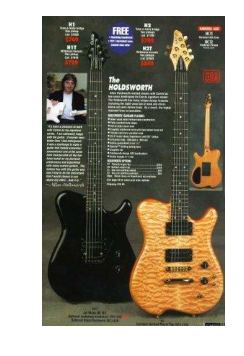

[1 0 4 3 2]
guitar (score = 0.98644)
house (score = 0.00388)
animal (score = 0.00338)
flower (score = 0.00335)
plane (score = 0.00295)

retrain/images/house1.jpg


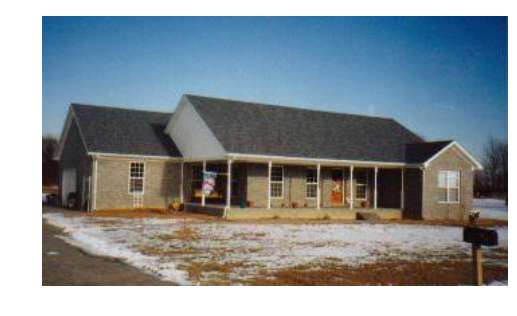

[0 3 4 2 1]
house (score = 0.93613)
flower (score = 0.02331)
animal (score = 0.01925)
plane (score = 0.01298)
guitar (score = 0.00834)

retrain/images/house2.jpg


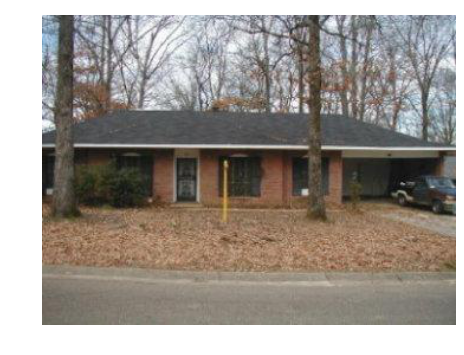

[0 4 2 3 1]
house (score = 0.98758)
animal (score = 0.00486)
plane (score = 0.00311)
flower (score = 0.00293)
guitar (score = 0.00152)

retrain/images/house3.jpg


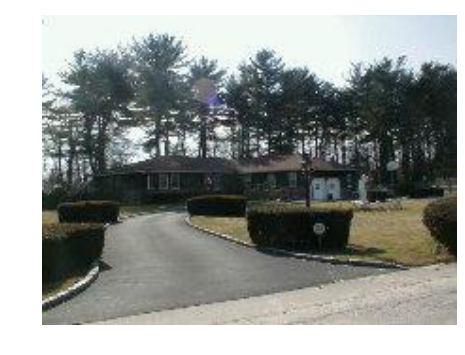

[0 2 3 4 1]
house (score = 0.93649)
plane (score = 0.01991)
flower (score = 0.01665)
animal (score = 0.01557)
guitar (score = 0.01138)

retrain/images/plane1.jpg


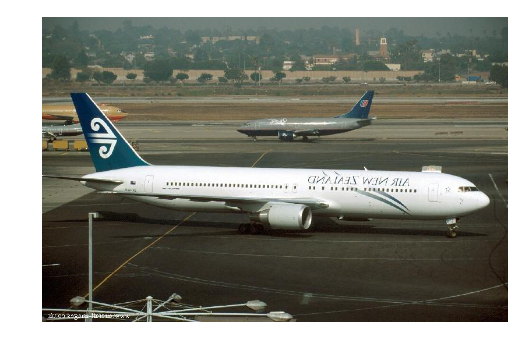

[2 4 1 3 0]
plane (score = 0.96152)
animal (score = 0.01571)
guitar (score = 0.00852)
flower (score = 0.00715)
house (score = 0.00710)

retrain/images/plane2.jpg


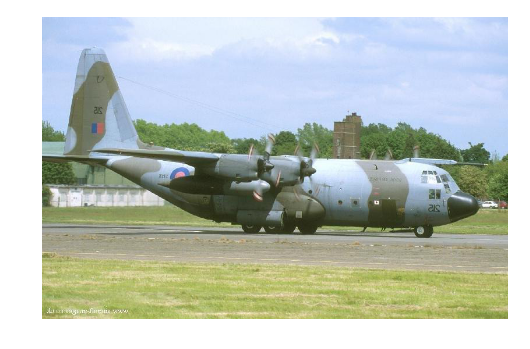

[2 4 3 1 0]
plane (score = 0.89007)
animal (score = 0.04128)
flower (score = 0.02936)
guitar (score = 0.02015)
house (score = 0.01916)

retrain/images/plane3.jpg


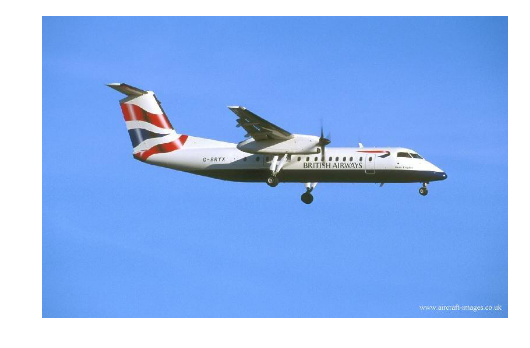

[2 4 0 3 1]
plane (score = 0.97753)
animal (score = 0.00891)
house (score = 0.00471)
flower (score = 0.00450)
guitar (score = 0.00435)



In [2]:
lines = tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human = {}
#一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('retrain/images/'):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            #排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:     
                #获取分类名称
                human_string = id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()